In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval
import pooch

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [3]:
import bbknn

In [4]:
adata_batch1 = sc.read("/home/jl4264/adata_1112-1112T-d3_QC_Doublet.h5ad")
adata_batch2 = sc.read("/home/jl4264/adata_1112-1136T-d3_QC_Doublet.h5ad")
adata_batch3 = sc.read("/home/jl4264/adata_1112-Mock-d3_QC_Doublet.h5ad")
adata_batch4 = sc.read("/home/jl4264/adata_1136-1112T-d3_QC_Doublet.h5ad")
adata_batch5 = sc.read("/home/jl4264/adata_1136-1136T-d3_QC_Doublet.h5ad")
adata_batch6 = sc.read("/home/jl4264/adata_1136-Mock-d3_QC_Doublet.h5ad")

In [5]:
adata_batch1.obs['batch'] = '1112-1112T-d3'
adata_batch2.obs['batch'] = '1112-1136T-d3'
adata_batch3.obs['batch'] = '1112-Mock-d3'
adata_batch4.obs['batch'] = '1136-1112T-d3'
adata_batch5.obs['batch'] = '1136-1136T-d3'
adata_batch6.obs['batch'] = '1136-Mock-d3'

In [6]:
adata_concat = adata_batch1.concatenate(adata_batch2, adata_batch3, adata_batch4, adata_batch5, adata_batch6, batch_key="batch", join='outer')

/tmp/ipykernel_2412833/1035654222.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_batch1.concatenate(adata_batch2, adata_batch3, adata_batch4, adata_batch5, adata_batch6, batch_key="batch", join='outer')


In [7]:
# List of columns to process
columns = [
    'gene_ids-0', 'feature_types-0', 'genome-0', 'mt-0', 'ribo-0', 'hb-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'mt-1', 'ribo-1', 'hb-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'genome-2', 'mt-2', 'ribo-2', 'hb-2', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'mt-3', 'ribo-3', 'hb-3', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'log1p_total_counts-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'genome-4', 'mt-4', 'ribo-4', 'hb-4', 'n_cells_by_counts-4', 'mean_counts-4', 'log1p_mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'log1p_total_counts-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'genome-5', 'mt-5', 'ribo-5', 'hb-5', 'n_cells_by_counts-5', 'mean_counts-5', 'log1p_mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'log1p_total_counts-5', 'n_cells-5'
]

# Generate the commands
for column in columns:
    adata_concat.var[column] = adata_concat.var[column].astype(str)

In [8]:
# Saving count data
adata_concat.layers["counts"] = adata_concat.X.copy()

In [9]:
# Normalizing to median total counts
sc.pp.normalize_total(adata_concat, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata_concat)

In [10]:
#sc.pp.highly_variable_genes(adata_concat, n_top_genes=2000, batch_key="batch")
sc.pp.highly_variable_genes(adata_concat, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [11]:
#adata_concat = adata_concat[:, adata_concat.var.highly_variable]

In [12]:
sc.pp.regress_out(adata_concat, ["total_counts", "pct_counts_mt"])


In [13]:
#help(sc.pp.scale)

In [14]:
sc.pp.scale(adata_concat, max_value=10)

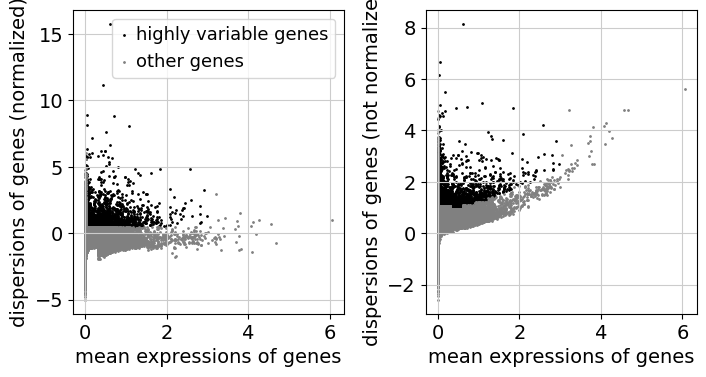

In [15]:
sc.pl.highly_variable_genes(adata_concat)

In [16]:
sc.tl.pca(adata_concat)

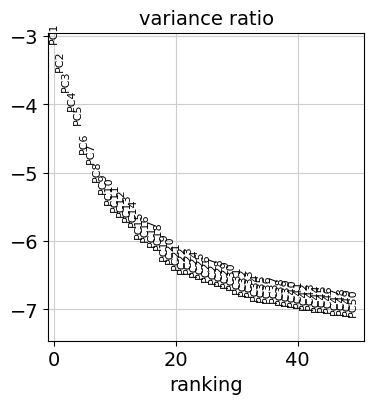

In [17]:
sc.pl.pca_variance_ratio(adata_concat, n_pcs=50, log=True)

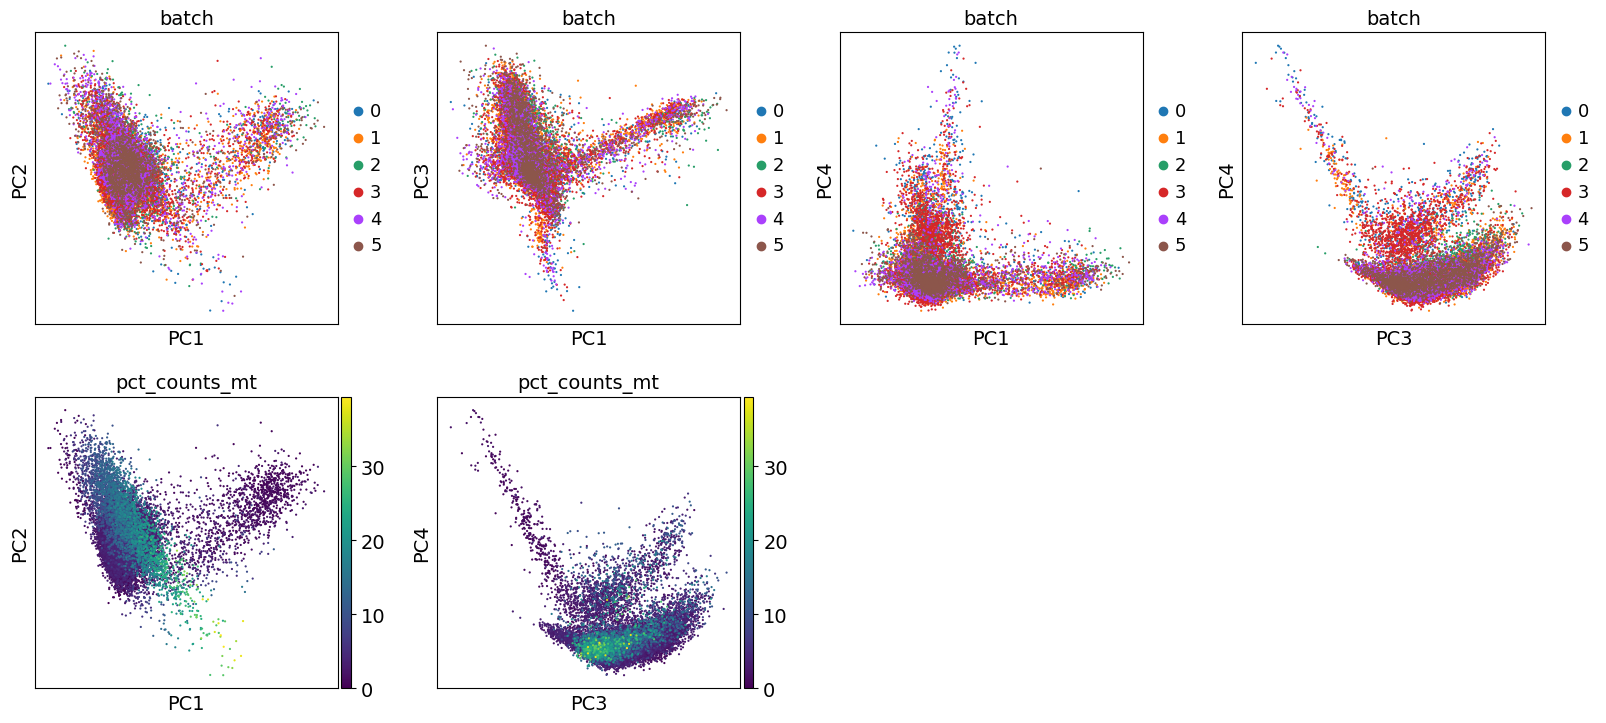

In [18]:
sc.pl.pca(
    adata_concat,
    color=["batch", "batch", "batch", "batch", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (0, 2), (0, 3), (2, 3), (0, 1), (2, 3)],
    ncols=4,
    size=10,
)

In [19]:
sc.pp.neighbors(adata_concat)

In [20]:
sc.tl.umap(adata_concat)

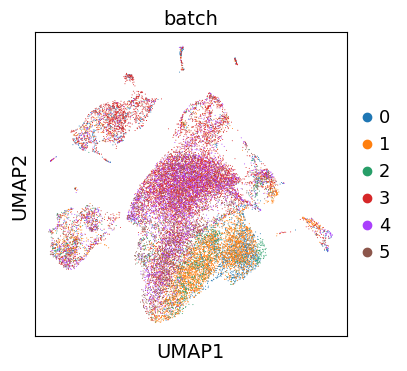

In [21]:
sc.pl.umap(
    adata_concat,
    color="batch",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

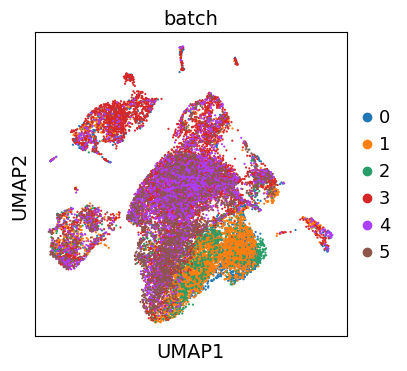

In [22]:
sc.pl.umap(
    adata_concat,
    color="batch",
    # Setting a smaller point size to get prevent overlap
    size=10,
)

In [23]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata_concat, flavor="igraph", n_iterations=2)

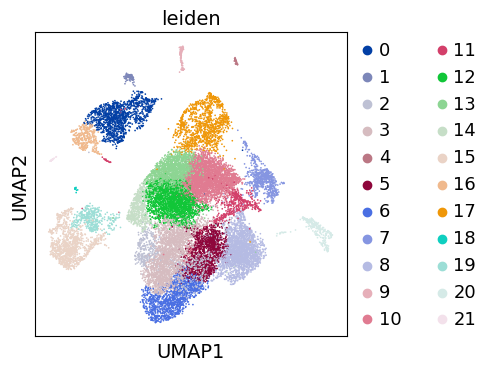

In [24]:
sc.pl.umap(adata_concat, color=["leiden"])

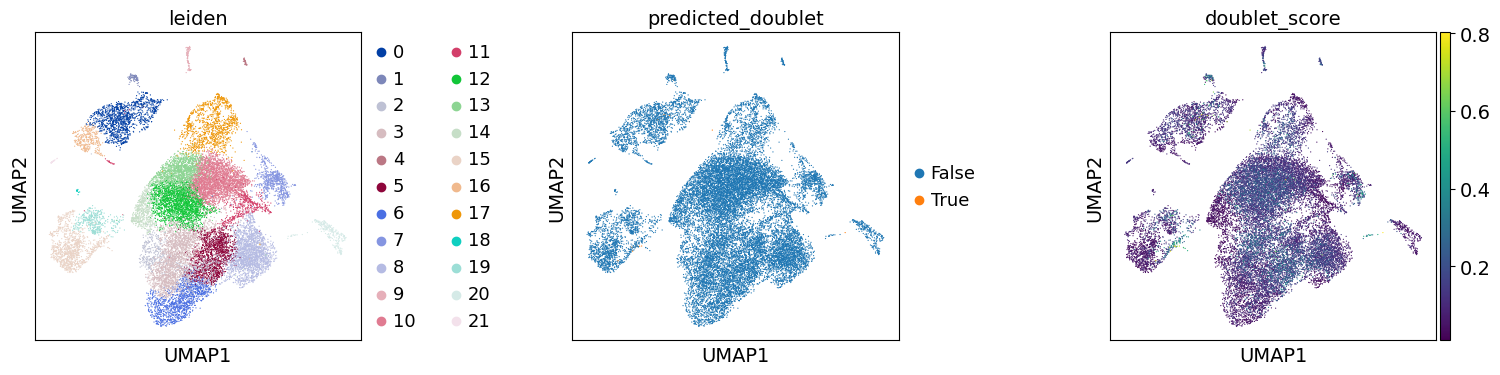

In [25]:
sc.pl.umap(
    adata_concat,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

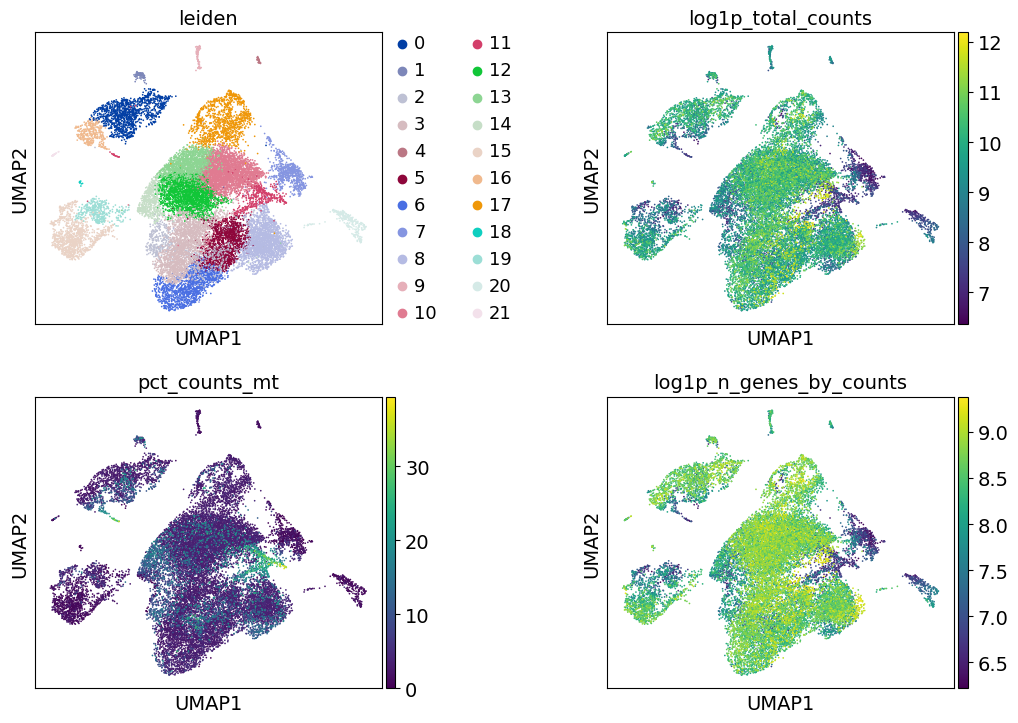

In [26]:
sc.pl.umap(
    adata_concat,
    color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace=0.5,
    ncols=2,
)

In [29]:
adata_concat.write("./adata_concat_normalization_ScaleAndTargtSum_JoinedOuter.h5ad")

In [28]:
adata_concat

AnnData object with n_obs × n_vars = 20235 × 25903
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'mt-0', 'ribo-0', 'hb-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'mt-1', 'ribo-1', 'hb-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', '